In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import healpy as hp
import tqdm


sys.path.append('../pipeline_scripts/')
from pipeline_main import serialize_dictionary, pipeline
from plotting_setup import *


In [2]:
data = pipeline(snap = 223, run = 'sink13fmr05', sink_id=13)

Initialising patch data
Assigning relative cartesian velocities and coordinates to all cells
Assigning masses to all cells
Calculating adiabatic index γ and pressure (polytropic) for all cells


100%|██████████| 4165/4165 [00:06<00:00, 657.05it/s]


In [3]:
map_data = serialize_dictionary(filename = 'sink13fmr05_accretion_maps.pkl', store = False)

In [4]:
nside = 45
npix = hp.nside2npix(nside)
shell_r = 50 / data.au_length
Lat = np.unique(hp.pix2ang(nside, np.arange(npix))[0]) - np.pi/2

time = map_data['time']

In [5]:
infall = np.zeros((len(time), len(Lat) - 1))
outflow = np.zeros_like(infall)

for t in tqdm.tqdm(range(len(time))):
    map = map_data['maps'][t]
    bool_pos = map > 0; bool_neg = map < 0
    inflow_pixels = map[bool_pos]
    outflow_pixels = map[bool_neg]

    Lat_in, _ = hp.pix2ang(nside, np.arange(npix)[bool_pos]) 
    Lat_out, _ = hp.pix2ang(nside, np.arange(npix)[bool_neg]) 
    infall_index = np.argsort(inflow_pixels)[::-1]

    cell_area = hp.nside2pixarea(nside) * shell_r**2

    sphere_area = cell_area * npix 

    count_in, bins = np.histogram(Lat_in - np.pi/2, bins = Lat, weights = inflow_pixels )
    count_out, bins = np.histogram(Lat_out - np.pi/2, bins = Lat, weights = outflow_pixels )

    infall[t] = count_in; outflow[t] = count_out


100%|██████████| 289/289 [00:00<00:00, 498.78it/s]


In [6]:
bin_center = 0.5 * (bins[:-1] + bins[1:])

In [7]:
t_new = np.arange(0, (len(time)) * 200, 200)

In [8]:
t_new.shape[0] + 223

512

/tmp/ipykernel_28546/705162954.py:3: RuntimeWarning: divide by zero encountered in log10
  ct = axs.pcolormesh(t_new*1e-3, bin_center, np.log10(infall.T), cmap = 'RdPu', vmin = -10, vmax = -6)


[Text(0, 0.5, 'Angle above midplane [rad]'), Text(0.5, 0, 'Time [kyr]')]

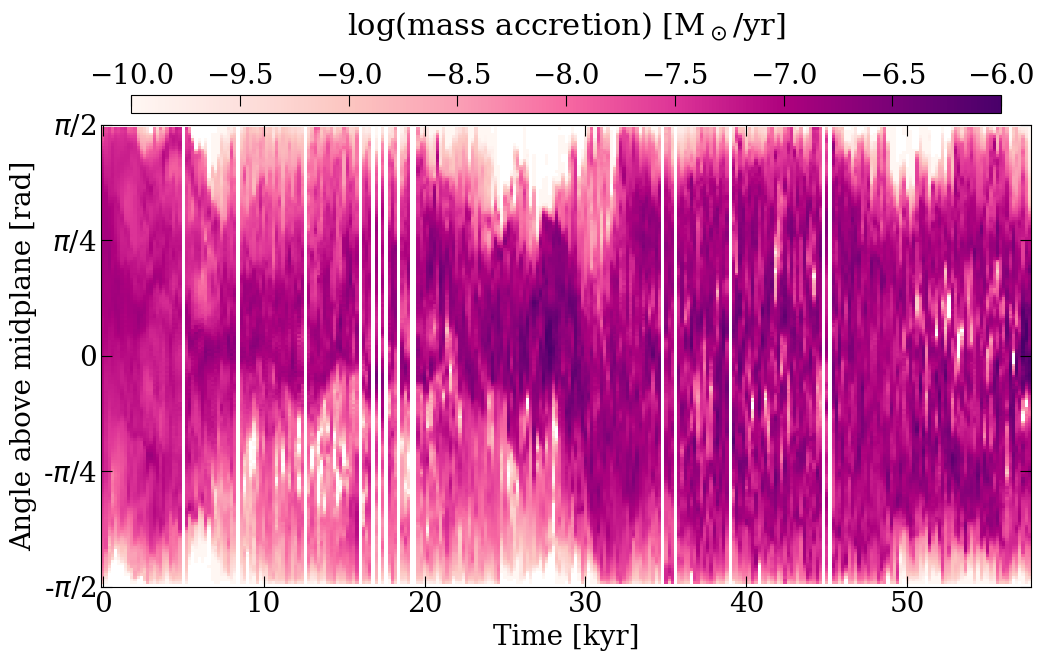

In [9]:
fig, axs = plt.subplots(figsize = (12,6))

ct = axs.pcolormesh(t_new*1e-3, bin_center, np.log10(infall.T), cmap = 'RdPu', vmin = -10, vmax = -6)

cbaxes_top = fig.add_axes([0.15, 0.9, 0.725, 0.03])  # Position and size adjusted for top placement
cbar_top = fig.colorbar(ScalarMappable(norm=ct.norm, cmap=ct.cmap), cax = cbaxes_top, orientation='horizontal')
cbar_top.ax.xaxis.set_ticks_position("top")
cbar_top.set_label('log(mass accretion) [M$_\odot$/yr]',labelpad =20, fontsize = 22)
cbar_top.ax.xaxis.set_ticks_position('top')
cbar_top.ax.xaxis.set_label_position('top')

values = np.linspace(-np.pi/2, np.pi/2, 5)
names = ['-$π$/2', '-$π$/4', '0', '$π$/4', '$π$/2']
axs.set_yticks(values); axs.set_yticklabels(names)
axs.set(ylabel = 'Angle above midplane [rad]', xlabel = 'Time [kyr]')


[Text(0, -1.5707963267948966, '-$π$/2'),
 Text(0, -0.7853981633974483, '-$π$/4'),
 Text(0, 0.0, '0'),
 Text(0, 0.7853981633974483, '$π$/4'),
 Text(0, 1.5707963267948966, '$π$/2')]

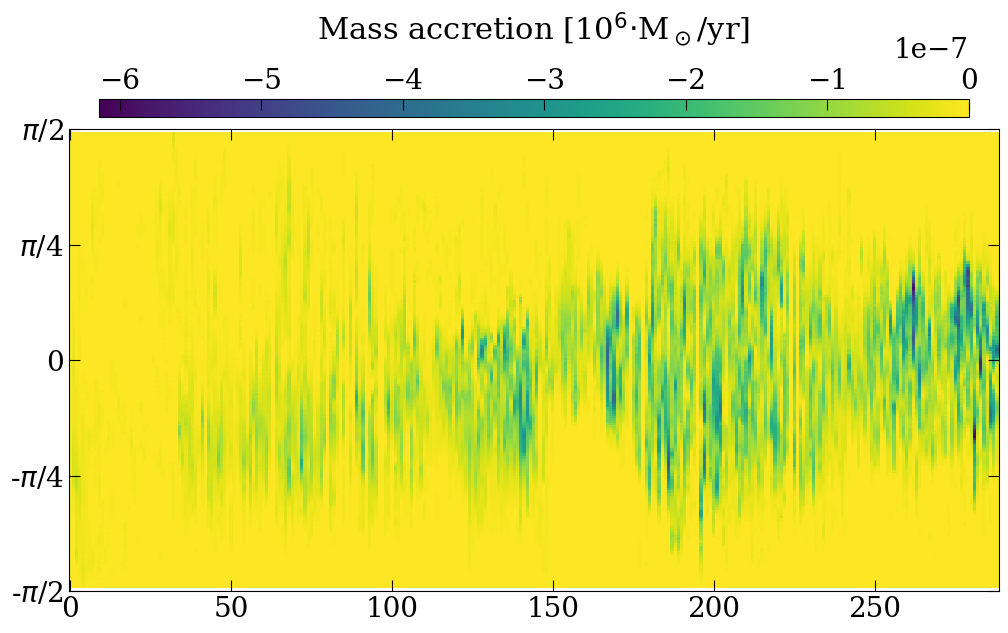

In [10]:
fig, axs = plt.subplots(figsize = (12,6))

ct = axs.pcolormesh([i for i in range(len(time))], bin_center, outflow.T)

cbaxes_top = fig.add_axes([0.15, 0.9, 0.725, 0.03])  # Position and size adjusted for top placement
cbar_top = fig.colorbar(ScalarMappable(norm=ct.norm, cmap=ct.cmap), cax = cbaxes_top, orientation='horizontal')
cbar_top.ax.xaxis.set_ticks_position("top")
cbar_top.set_label('Mass accretion [10$^6$$\cdot$M$_\odot$/yr]',labelpad =20, fontsize = 22)
cbar_top.ax.xaxis.set_ticks_position('top')
cbar_top.ax.xaxis.set_label_position('top')

values = np.linspace(-np.pi/2, np.pi/2, 5)
names = ['-$π$/2', '-$π$/4', '0', '$π$/4', '$π$/2']
axs.set_yticks(values); axs.set_yticklabels(names)

